In [3]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [5]:
dataset.shape

(400, 5)

In [6]:
dataset.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
dataset.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


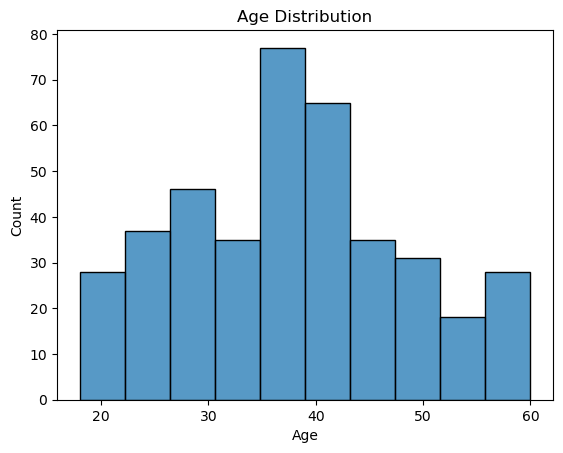

In [12]:
sns.histplot(dataset.Age)
plt.title('Age Distribution')
plt.show()

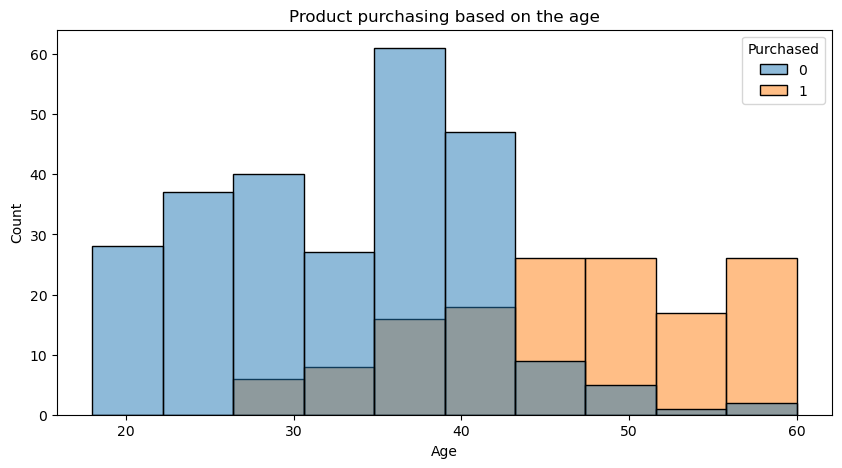

In [13]:
#Checking purchases within Age groups
plt.figure (figsize = (10,5))
plt.title('Product purchasing based on the age')
sns.histplot(x='Age', hue = 'Purchased', data = dataset)
plt.show()

In [14]:
dataset['Gender'] = dataset['Gender'].replace(['Male', 'Female'],[0,1])

C:\Users\sup595\AppData\Local\Temp\ipykernel_18628\3753651259.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'] = dataset['Gender'].replace(['Male', 'Female'],[0,1])


In [15]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [16]:
#CLASSIFICATION

In [20]:
#slice into input/output
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values

In [21]:
#training/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 0)

In [22]:
#Scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [26]:
#Fitting KNN to the Training Set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [27]:
#Predicting the Test set results
y_pred = classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 0 1]


In [29]:
#Evaluating model performance

from sklearn import metrics
acc = metrics.accuracy_score (y_test, y_pred)
print ('accuracy: %.2f\n\n'%(acc))

cm = metrics.confusion_matrix(y_test, y_pred)
print ('Confusion Matrix: ')
print (cm, '\n\n')
print('------------------------------------------------------------------')

result = metrics.classification_report(y_test, y_pred)
print ('Classification Report:\n')
print (result)

accuracy: 0.92


Confusion Matrix: 
[[73  6]
 [ 4 37]] 


------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



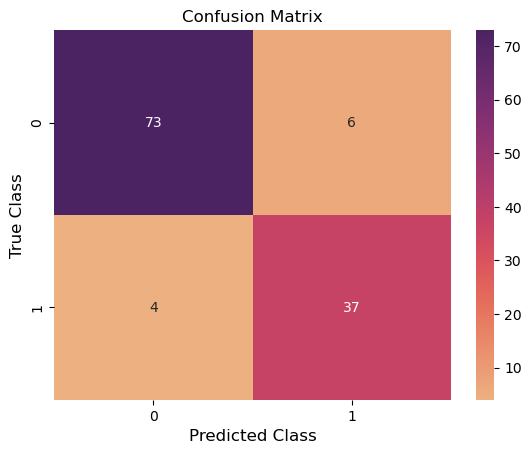

In [30]:
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title ('Confusion Matrix', fontsize = 12)

plt.show()